<a href="https://colab.research.google.com/github/garridoeduardo1000-afk/Simulacion-2-Eduardo-Gonzalez-/blob/main/metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

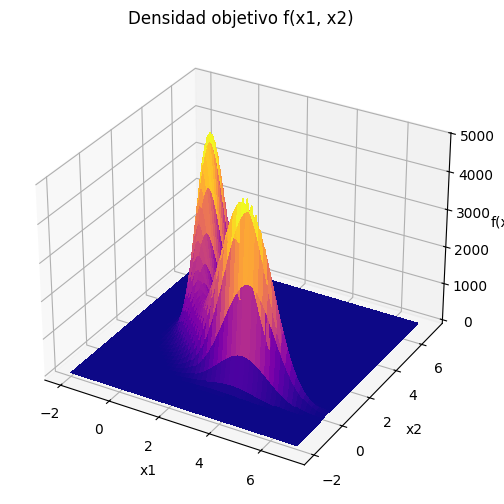

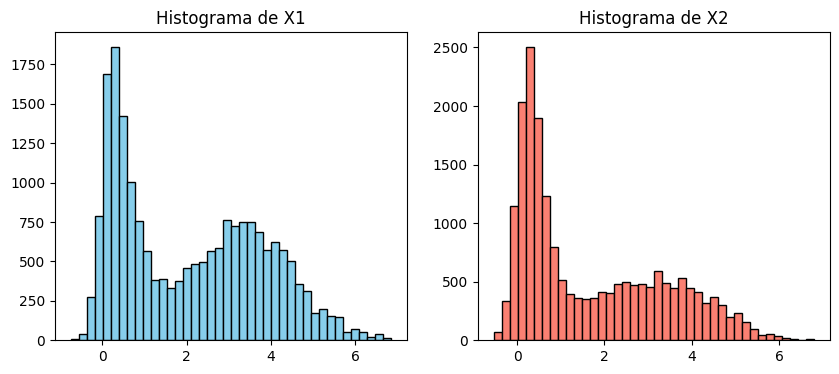

Punto de máxima densidad aproximado: x1=0.267, x2=3.739


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función objetivo (no normalizada)
def f(x1, x2):
    """Función de densidad no normalizada f(x1, x2)."""
    expo = -0.5 * (x1**2 * x2**2 + x1**2 + x2**2 - 8*x1 - 8*x2)#en lugar de 1/2 expresamos la funcion como 0.5
    return np.exp(expo)

# Algoritmo de Metropolis-Hastings
def metropolis_hastings(f, num_samples=5000, proposal_std=0.5):
    samples = np.zeros((num_samples, 2))

    # Inicializamos la cadena en (0,0)
    x_current = np.array([0.0, 0.0])
    f_current = f(*x_current)

    for i in range(num_samples):
        # Propuesta: paso aleatorio normal alrededor del estado actual
        x_proposed = x_current + np.random.normal(scale=proposal_std, size=2)
        f_proposed = f(*x_proposed)

        # Calculamos la razón de aceptación
        alpha = min(1, f_proposed / f_current)

        # Aceptamos o rechazamos
        if np.random.rand() < alpha:
            x_current = x_proposed
            f_current = f_proposed

        # se guarda la muestra
        samples[i] = x_current

    return samples

# Ejecutamos el muestreo
np.random.seed(42)
samples = metropolis_hastings(f, num_samples=20000, proposal_std=0.6)

# Graficamos la función objetivo
x1 = np.linspace(-2, 7, 200)
x2 = np.linspace(-2, 7, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, cmap='plasma', linewidth=0, antialiased=False)
ax.set_title('Densidad objetivo f(x1, x2)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.show()

# Histogramas para verificar la distribución marginal
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(samples[:, 0], bins=40, color='skyblue', edgecolor='black')
axs[0].set_title("Histograma de X1")
axs[1].hist(samples[:, 1], bins=40, color='salmon', edgecolor='black')
axs[1].set_title("Histograma de X2")
plt.show()

# Estimación del punto de máxima densidad (modo)

# Buscamos el punto con mayor valor de f en las muestras
idx_max = np.argmax([f(x[0], x[1]) for x in samples])
x_mode = samples[idx_max]
print(f"Punto de máxima densidad aproximado: x1={x_mode[0]:.3f}, x2={x_mode[1]:.3f}")
